# Set-up

In [1]:
# load packages
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import math
import statsmodels.api as sm
import matplotlib.ticker as mtick
import seaborn as sns

In [7]:
data = pd.DataFrame()
attibutes= pd.DataFrame()
base_site = "https://kolesa.kz/cars/?"
inner_site = "https://kolesa.kz/a/show/"

for i in range(1):
    if i%5 == 0:
        print(i)
    response = requests.get(base_site+"page={}".format(i))
    html = response.content
#     print(response.status_code)
    soup = BeautifulSoup(html, 'lxml')
    
    divs = soup.find_all('div', {'class': 'a-info-side col-right-list'})
    a = [divs.find('a', class_='list-link ddl_product_link') for divs in divs]
    ID = [a['data-product-id'] for a in a]
    car_name = [divs.find('a').string for divs in divs]
    price = [divs.find('span', class_="price").text for divs in divs]
    price = [int(''.join(price.split('                    ')[1].split('\xa0')[:-1])) for price in price]
    
    for k in ID:
#         print(k)
        response2 = requests.get(inner_site+"{}".format(k))
        html2 = response2.content
        soup2 = BeautifulSoup(html2, 'lxml')
        h1 = soup2.find('h1', {'class': 'offer__title'})
        brand = h1.find('span', itemprop="brand").string
        if h1.find('span', itemprop="name") != None:
            make = h1.find('span', itemprop="name").string
        year = int(h1.find('span', class_="year").string)

        div = soup2.find('div', {'class': 'offer__parameters'})   
        d={}
        for i in div.find_all('dt'):
            if i.find('span') != None:
                d['{}'.format(i.find('span').string)]=div.find('dt', title=i['title']).parent.find('dd').string.strip()
        d.update({'Марка': brand, 'Модель': make, 'Год выпуска': year})
        data1 = [d]
#         print(data1)
        attibutes = attibutes.append(data1,ignore_index=True,sort=False)
    
    new_data=pd.DataFrame()
    new_data['Car_Name'] = car_name
    new_data['Price'] = price
    new_data['ID'] = ID
    data = pd.concat([data,new_data], axis=0, ignore_index=True)
data = data.join(attibutes)

0


In [348]:
# data.to_excel(r'C:\Users\ecws\Desktop\Udemy\Kolesa3.xlsx', index = False)

In [448]:
data = pd.read_excel(r'C:\Users\ecws\Desktop\Udemy\Kolesa2.xlsx')

In [353]:
# data.drop_duplicates(subset='ID', inplace = True)
# data['Пробег'] = data['Пробег'].str.strip(' км').str.replace(" ","").apply(pd.to_numeric, errors='ignore', downcast= 'integer')

In [449]:
data.dropna(axis=0, how='any', subset = ['Объем двигателя, л'], inplace = True)
data['Возраст'] = 2020 - data['Год выпуска']
new = data['Объем двигателя, л'].str.split(" ", n = 1, expand = True)
data['Объем двигателя, л'] = new[0].astype(float)
data['Двигатель'] = new[1].str.strip('()')
data['Цвет'] = data['Цвет'].str.split(" ", n = 1, expand = True)[0]
data['Растаможен в Казахстане'] = data['Растаможен в Казахстане'].replace({'Да': True, 'Нет': False})
data.drop(axis=1, columns=['VIN', 'Год выпуска'], inplace=True)

In [450]:
data

,Авто,Цена,ID,Город,Кузов,"Объем двигателя, л",Пробег,Коробка передач,Руль,Цвет,Привод,Растаможен в Казахстане,Марка,Модель,Двигатель,Возраст
0,Nissan Terrano,6200000,105113057,Нур-Султан (Астана),кроссовер,2.0,10000.0,автомат,слева,черный,полный привод,True,Nissan,Terrano,бензин,3
1,ВАЗ (Lada) Vesta,4500000,102873487,Атырау,седан,1.6,57000.0,робот,слева,коричневый,передний привод,True,ВАЗ (Lada),Vesta,бензин,2
2,Lexus ES 350,17500000,92361652,Шымкент,седан,3.5,60000.0,автомат,слева,белый,передний привод,True,Lexus,ES 350,бензин,3
3,Dodge Intrepid,1350000,104165638,Караганда,седан,2.7,200000.0,автомат,слева,золотистый,передний привод,True,Dodge,Intrepid,бензин,16
4,Nissan Cefiro,1600000,105166929,Караганда,седан,2.0,NaN,типтроник,справа,черный,передний привод,True,Nissan,Cefiro,бензин,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15850,ВАЗ (Lada) 2121 Нива,1200000,105249100,Нур-Султан (Астана),внедорожник,1.7,NaN,механика,слева,вишня,полный привод,True,ВАЗ (Lada),2121 Нива,бензин,13
15851,Toyota Camry,2750000,105249043,Кызылорда,седан,3.0,245426.0,автомат,слева,коричневый,передний привод,True,Toyota,Camry,бензин,22
15852,ВАЗ (Lada) 2190 (седан),1900000,105249786,Актау,седан,1.6,144000.0,механика,слева,NaN,передний привод,True,ВАЗ (Lada),2190 (седан),газ-бензин,7
15853,Audi A6,1500000,103983295,Павлодар,седан,2.4,250000.0,автомат,слева,NaN,передний привод,True,Audi,A6,бензин,23


In [463]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15845 entries, 0 to 15854
Data columns (total 16 columns):
Авто                       15845 non-null object
Цена                       15845 non-null int64
ID                         15845 non-null int64
Город                      15845 non-null object
Кузов                      15845 non-null object
Объем двигателя, л         15845 non-null float64
Пробег                     10811 non-null float64
Коробка передач            15845 non-null object
Руль                       15845 non-null object
Цвет                       13335 non-null object
Привод                     14229 non-null object
Растаможен в Казахстане    15845 non-null bool
Марка                      15844 non-null object
Модель                     15845 non-null object
Двигатель                  15845 non-null object
Возраст                    15845 non-null int64
dtypes: bool(1), float64(2), int64(3), object(10)
memory usage: 2.6+ MB


In [464]:
data.describe()

,Цена,ID,"Объем двигателя, л",Пробег,Возраст
count,1.584500e+04,1.584500e+04,15845.000000,1.081100e+04,15845.000000
mean,5.628920e+06,1.025656e+08,2.460527,1.822339e+05,13.796781
std,7.881336e+06,8.564799e+06,1.025523,4.472537e+05,8.977220
min,1.000000e+04,5.014122e+06,0.080000,1.000000e+00,0.000000
25%,1.600000e+06,1.032345e+08,1.600000,6.700000e+04,7.000000
50%,3.500000e+06,1.048968e+08,2.200000,1.240000e+05,13.000000
75%,6.500000e+06,1.052500e+08,2.900000,2.000000e+05,21.000000
max,2.800000e+08,1.052658e+08,9.000000,9.999999e+06,73.000000


Mean =  4948333.893709884
Median = 3400000.0
SD =  4926861.777470155


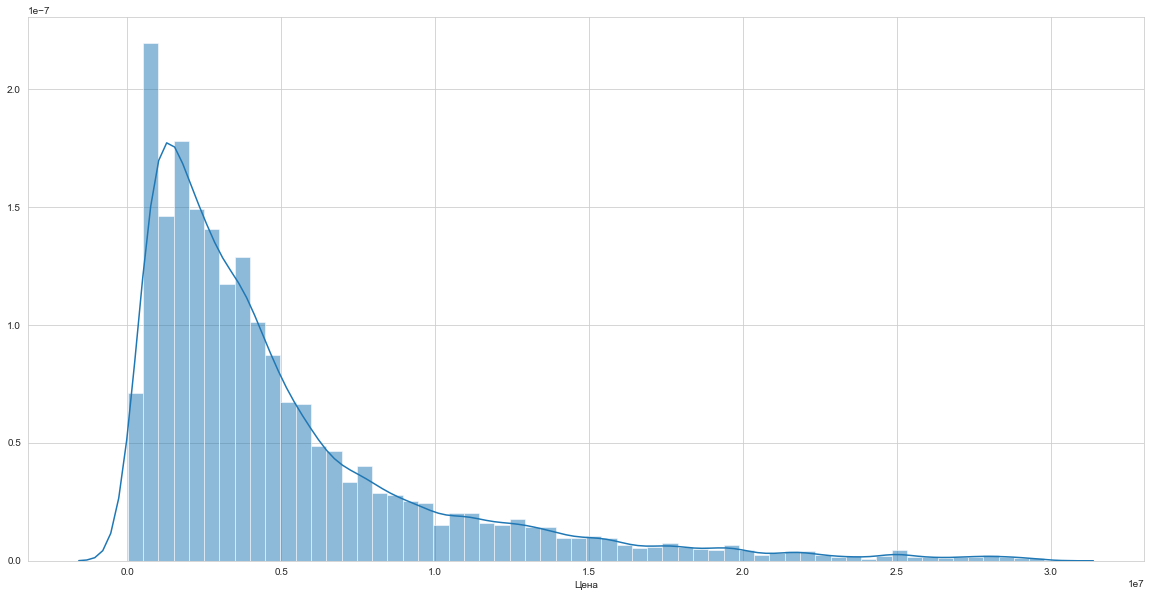

In [477]:
y = data[data['Цена']<30000000]
plt.figure(figsize=(20,10))
sns.set_style("whitegrid")
sns.distplot(y['Цена'], kde=True,bins=60, hist_kws={"histtype": 'bar', "linewidth": 1, "alpha": 0.5})
variance = y['Цена'].var()
print('Mean = ', y['Цена'].mean())
print('Median =', y['Цена'].median())
print('SD = ', math.sqrt(variance))

Mean =  138367.30268634128
Median = 121000.0
SD =  100145.53713813702
Min = 1.0
Max = 497217.0


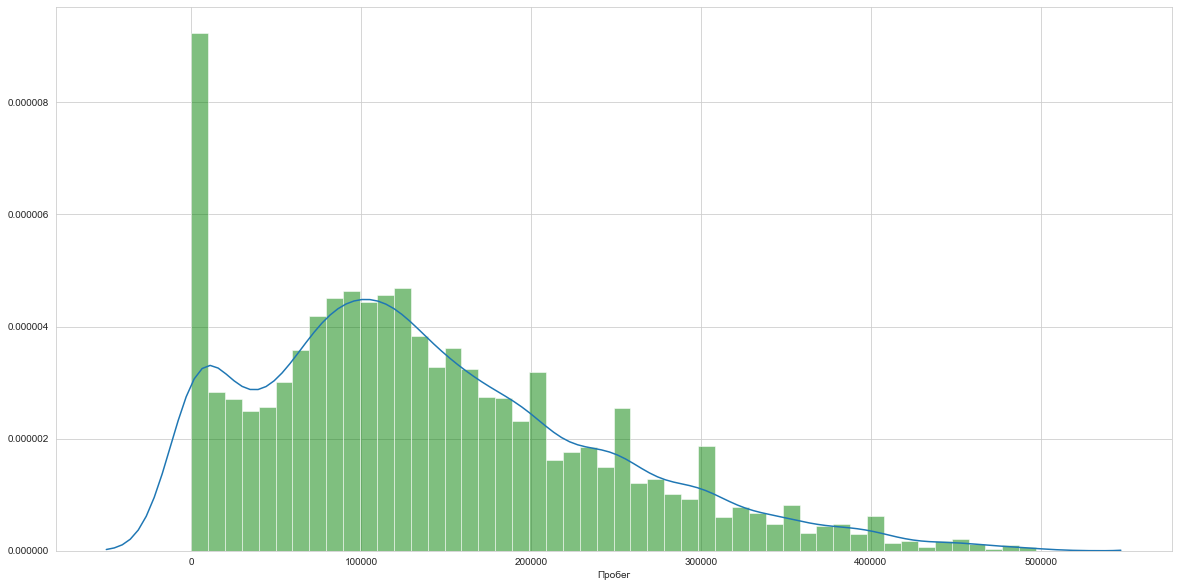

In [488]:
plt.figure(figsize=(20,10))
y = data[data['Пробег']<500000]
sns.distplot(y['Пробег'], kde=True,bins=50, hist_kws={"color": 'green', "linewidth": 1, "alpha": 0.5})
print('Mean = ', y['Пробег'].mean())
print('Median =', y['Пробег'].median())
print('SD = ', math.sqrt(y['Пробег'].var()))
print('Min =', y['Пробег'].min())
print('Max =', y['Пробег'].max())

Mean =  13.796781319028085
Median = 13.0
SD =  8.977220308312399
Min = 0
Max = 73


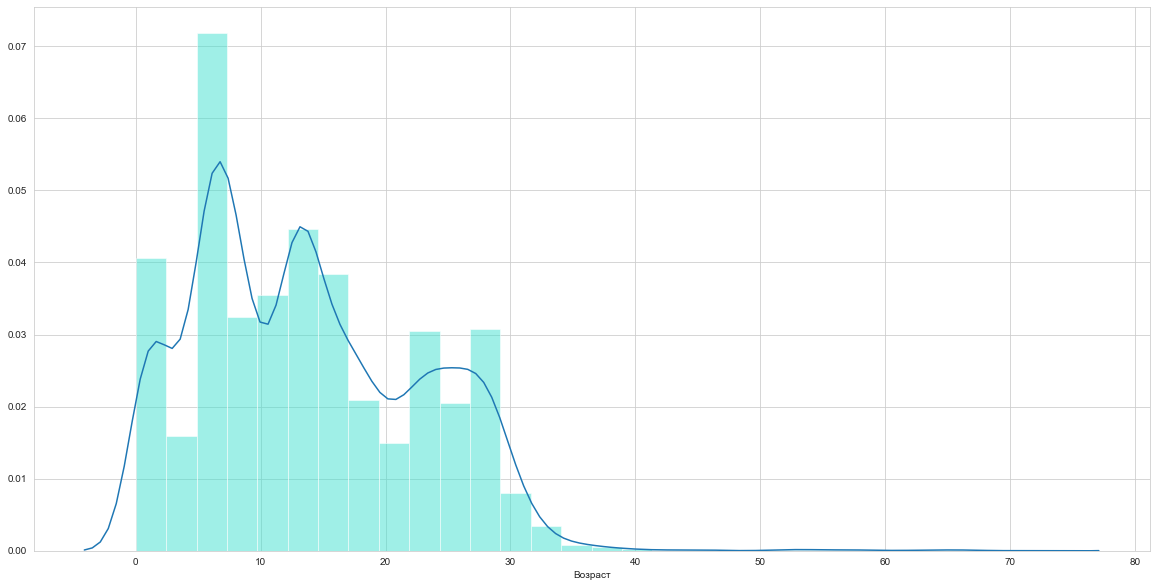

In [490]:
plt.figure(figsize=(20,10))
sns.distplot(data['Возраст'], kde=True,bins=30, hist_kws={"color": 'turquoise', "linewidth": 1, "alpha": 0.5})
print('Mean = ', data['Возраст'].mean())
print('Median =', data['Возраст'].median())
print('SD = ', math.sqrt(data['Возраст'].var()))
print('Min =', data['Возраст'].min())
print('Max =', data['Возраст'].max())

In [261]:
# Group by Марка and sort in descending order to plot 15 most popular car brands
df = data.groupby('Марка').count().sort_values('ID', ascending=False,).head(15)

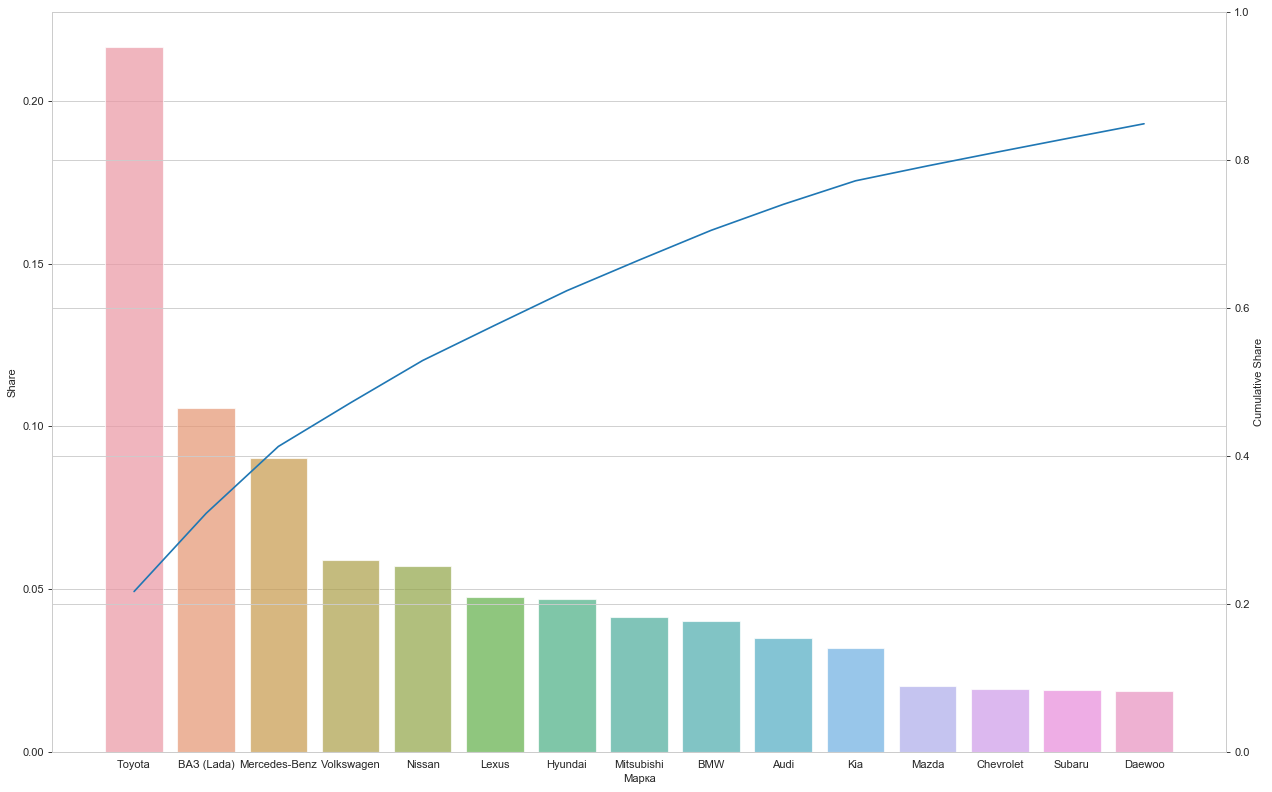

In [454]:
# Plot car brand market share (left axis) and cumulative share (right axis)
fig, ax1 = plt.subplots(figsize=(16,10), facecolor='white', dpi= 80)

sns.barplot(x=df.index, y=df.ID/data.index.size, alpha=0.7, linewidth=1)
ax1.set_ylabel('Share')
ax1.tick_params(axis='y')

ax2 = ax1.twinx()
ax2.set_ylabel('Cumulative Share') 
df['cdf'] = (df.ID/data.index.size).cumsum()
plt.plot(df.index, df['cdf'])
ax2.tick_params(axis='y')
ax2.set(ylim=(0, 1))
fig.tight_layout()

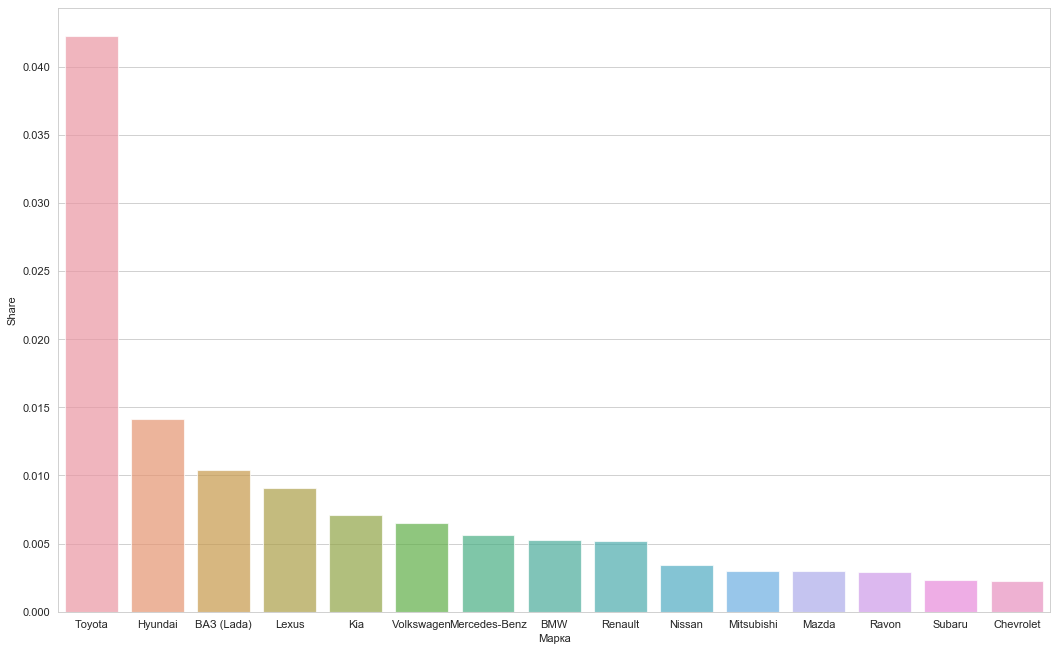

In [455]:
# Now let's see how distribution will change for newer cars (age<5years)
df2 = data[data['Возраст']<5].groupby('Марка').count().sort_values('ID', ascending=False,).head(15)
fig, ax1 = plt.subplots(figsize=(16,10), facecolor='white', dpi= 80)

sns.barplot(x=df2.index, y=df2.ID/data.index.size, alpha=0.7, linewidth=1)
ax1.set_ylabel('Share')
ax1.tick_params(axis='y')

In [456]:
df3 = data['Авто'].value_counts()
df3.head(15)

Toyota Camry                 1096
Toyota Land Cruiser Prado     414
Toyota Land Cruiser           356
Volkswagen Passat             285
ВАЗ (Lada) 2114 (хэтчбек)     274
Toyota Corolla                220
Toyota RAV 4                  217
Hyundai Accent                213
ВАЗ (Lada) 2170 (седан)       204
Volkswagen Golf               200
ГАЗ ГАЗель                    192
Audi 100                      174
Daewoo Nexia                  173
Lexus LX 570                  144
Kia Rio                       144
Name: Авто, dtype: int64

In [457]:
df4= data['Город'].value_counts()
df4[df4>100]

Алматы                 3779
Нур-Султан (Астана)    2744
Шымкент                1048
Караганда               940
Актобе                  693
Атырау                  659
Уральск                 560
Костанай                538
Актау                   522
Владивосток             450
Павлодар                380
Тараз                   378
Усть-Каменогорск        372
Кызылорда               271
Кокшетау                242
Петропавловск           220
Семей                   219
Талдыкорган             160
Туркестан               120
Name: Город, dtype: int64

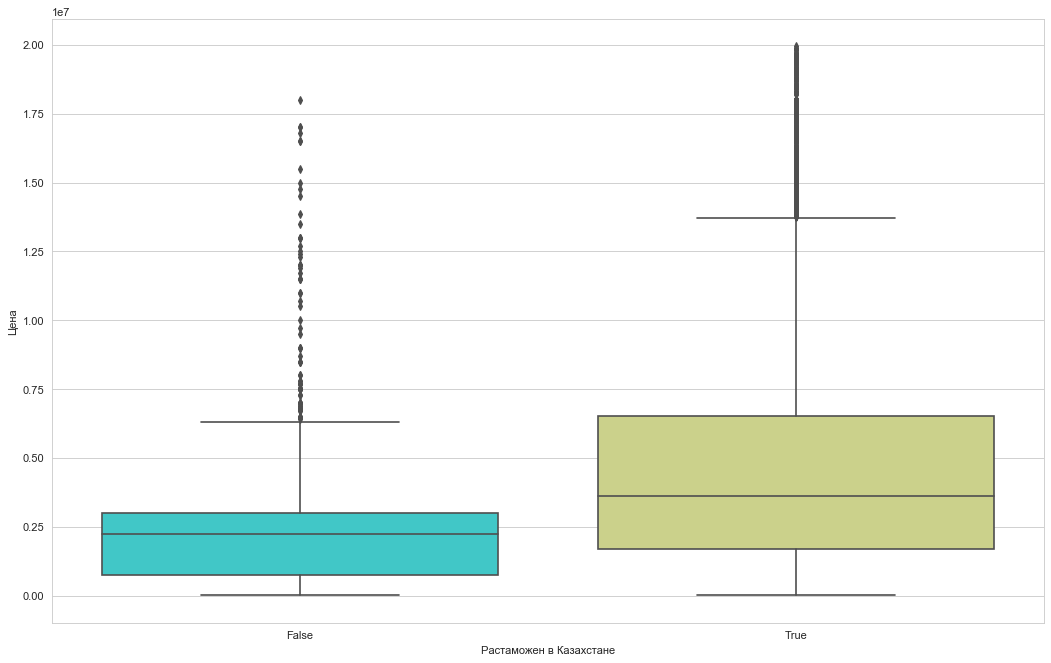

In [458]:
fig, ax1 = plt.subplots(figsize=(16,10), facecolor='white', dpi= 80)
sns.boxplot(x="Растаможен в Казахстане", y="Цена", data=data[data['Цена']<20000000],palette='rainbow')

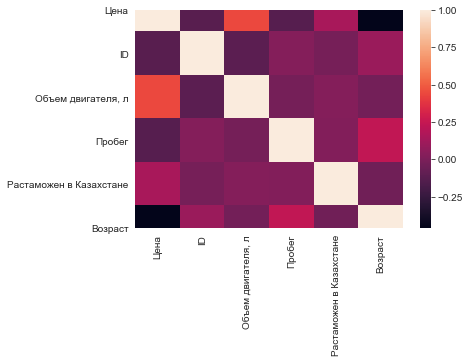

In [459]:
sns.heatmap(data.corr())

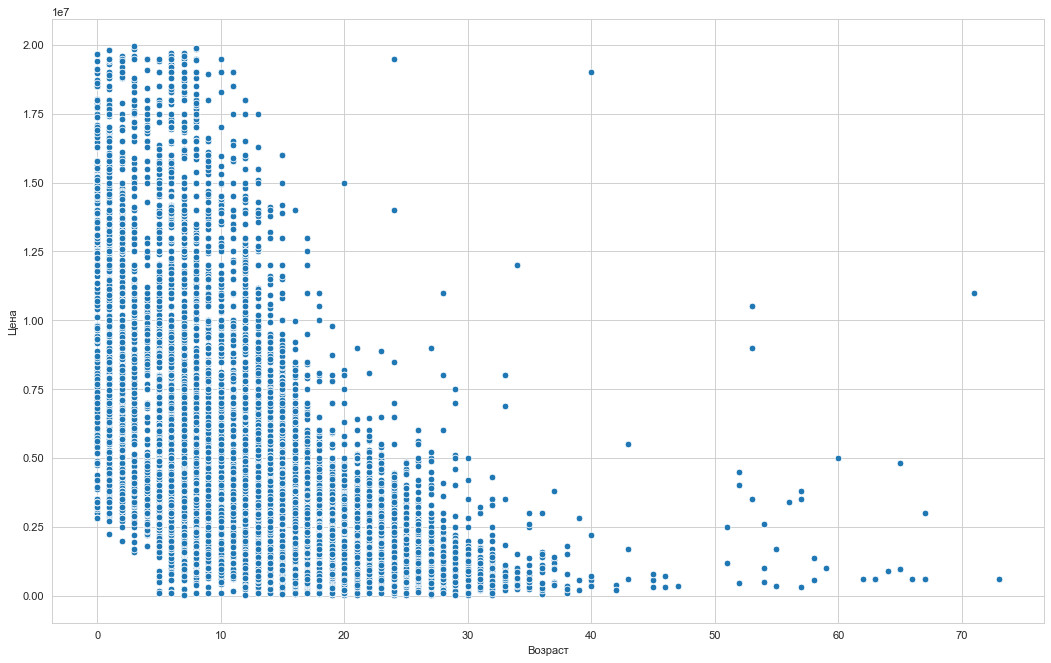

In [470]:
fig, ax1 = plt.subplots(figsize=(16,10), facecolor='white', dpi= 80)
sns.scatterplot(x = 'Возраст', y = 'Цена', data = data[data['Цена']<20000000])

In [235]:
data = pd.DataFrame()
attibutes= pd.DataFrame()
base_site = "https://kolesa.kz/"
inner_site = "https://kolesa.kz/cars"


response = requests.get(base_site)
html = response.content
print(response.status_code)
soup = BeautifulSoup(html, 'lxml')
divs = soup.find_all('ul', {'class': 'col-sm-2'})
all = []
for i in range(12):
    all += divs[i]
all = all[1:]
cars = [all.find('a') for all in all]
cars = [x.string for x in cars if not isinstance(x, int)]
set(cars)

# https://kolesa.kz/cars/acura/?page=5
for i in cars:
    for x in range(10):
#     if i%5 == 0:
#         print(i)
        response = requests.get(base_site+"cars/{}/?page={}".format(i,x))
        html = response.content
    #     print(response.status_code)
        soup = BeautifulSoup(html, 'lxml')
    
        divs = soup.find_all('div', {'class': 'a-info-side col-right-list'})
        a = [divs.find('a', class_='list-link ddl_product_link') for divs in divs]
        ID = [a['data-product-id'] for a in a]
        car_name = [divs.find('a').string for divs in divs]
        price = [divs.find('span', class_="price").text for divs in divs]
        price = [int(''.join(price.split('                    ')[1].split('\xa0')[:-1])) for price in price]

    #     for k in ID:
    # #         print(k)
    #         response2 = requests.get(inner_site+"{}".format(k))
    #         html2 = response2.content
    #         soup2 = BeautifulSoup(html2, 'lxml')
    #         h1 = soup2.find('h1', {'class': 'offer__title'})
    #         brand = h1.find('span', itemprop="brand").string
    #         if h1.find('span', itemprop="name") != None:
    #             make = h1.find('span', itemprop="name").string
    #         year = int(h1.find('span', class_="year").string)

    #         div = soup2.find('div', {'class': 'offer__parameters'})   
    #         d={}
    #         for i in div.find_all('dt'):
    #             if i.find('span') != None:
    #                 d['{}'.format(i.find('span').string)]=div.find('dt', title=i['title']).parent.find('dd').string.strip()
    #         d.update({'Марка': brand, 'Модель': make, 'Год выпуска': year})
    #         data1 = [d]
    # #         print(data1)
    #         attibutes = attibutes.append(data1,ignore_index=True,sort=False)
    
#     new_data=pd.DataFrame()
#     new_data['Car_Name'] = car_name
#     new_data['Price'] = price
#     new_data['ID'] = ID
#     data = pd.concat([data,new_data], axis=0, ignore_index=True)
# data = data.join(attibutes)

200


KeyboardInterrupt: 

In [228]:
# https://kolesa.kz/cars/acura/?page=5
response = requests.get(base_site+"cars/{}/?page={}".format('acura',1))
html = response.content
print(response.status_code)
soup = BeautifulSoup(html, 'lxml')
    
divs = soup.find_all('div', {'class': 'a-info-side col-right-list'})
a = [divs.find('a', class_='list-link ddl_product_link') for divs in divs]
ID = [a['data-product-id'] for a in a]
car_name = [divs.find('a').string for divs in divs]
price = [divs.find('span', class_="price").text for divs in divs]
price = [int(''.join(price.split('                    ')[1].split('\xa0')[:-1])) for price in price]

200


In [ ]:
cars


In [143]:
li = [divs.contents for divs in divs]
ul = [li]
a = li[0][1].find('a').string
divs

[<ul class="col-sm-2">
 <li>
 <a href="/cars/audi/">Audi</a> <small>5141</small></li>
 <li>
 <a href="/cars/bmw/">BMW</a> <small>4427</small></li>
 <li>
 <a href="/cars/bentley/">Bentley</a> <small>66</small></li>
 <li>
 <a href="/cars/cadillac/">Cadillac</a> <small>160</small></li>
 <li>
 <a href="/cars/changan/">Changan</a> <small>49</small></li>
 <li>
 <a href="/cars/chery/">Chery</a> <small>101</small></li>
 <li>
 <a href="/cars/chevrolet/">Chevrolet</a> <small>1958</small></li>
 <li>
 <a href="/cars/chrysler/">Chrysler</a> <small>243</small></li>
 <li>
 <a href="/cars/citroen/">Citroen</a> <small>59</small></li>
 </ul>, <ul class="col-sm-2">
 <li>
 <a href="/cars/daewoo/">Daewoo</a> <small>2544</small></li>
 <li>
 <a href="/cars/datsun/">Datsun</a> <small>50</small></li>
 <li>
 <a href="/cars/dodge/">Dodge</a> <small>151</small></li>
 <li>
 <a href="/cars/faw/">FAW</a> <small>170</small></li>
 <li>
 <a href="/cars/fiat/">Fiat</a> <small>64</small></li>
 <li>
 <a href="/cars/ford/"

In [116]:
divs[0]

<ul class="col-sm-2">
<li>
<a href="/cars/audi/">Audi</a> <small>5141</small></li>
<li>
<a href="/cars/bmw/">BMW</a> <small>4427</small></li>
<li>
<a href="/cars/bentley/">Bentley</a> <small>66</small></li>
<li>
<a href="/cars/cadillac/">Cadillac</a> <small>160</small></li>
<li>
<a href="/cars/changan/">Changan</a> <small>49</small></li>
<li>
<a href="/cars/chery/">Chery</a> <small>101</small></li>
<li>
<a href="/cars/chevrolet/">Chevrolet</a> <small>1958</small></li>
<li>
<a href="/cars/chrysler/">Chrysler</a> <small>243</small></li>
<li>
<a href="/cars/citroen/">Citroen</a> <small>59</small></li>
</ul>

In [99]:
divs[3].find_all('a')
li = []
for i in divs[3].find_all('a'):
    x = i.string
    print(x)
    

Lexus
Lifan
Lincoln
Mazda
Mercedes-Benz
Mini
Mitsubishi
Nissan
Opel


In [98]:
divs[3]

<ul class="col-sm-2">
<li>
<a href="/cars/lexus/">Lexus</a> <small>3799</small></li>
<li>
<a href="/cars/lifan/">Lifan</a> <small>261</small></li>
<li>
<a href="/cars/lincoln/">Lincoln</a> <small>99</small></li>
<li>
<a href="/cars/mazda/">Mazda</a> <small>2613</small></li>
<li>
<a href="/cars/mercedes-benz/">Mercedes-Benz</a> <small>10006</small></li>
<li>
<a href="/cars/mini/">Mini</a> <small>47</small></li>
<li>
<a href="/cars/mitsubishi/">Mitsubishi</a> <small>4775</small></li>
<li>
<a href="/cars/nissan/">Nissan</a> <small>6038</small></li>
<li>
<a href="/cars/opel/">Opel</a> <small>2671</small></li>
</ul>